<a href="https://colab.research.google.com/github/bggokmou/BigdataHomework/blob/master/12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

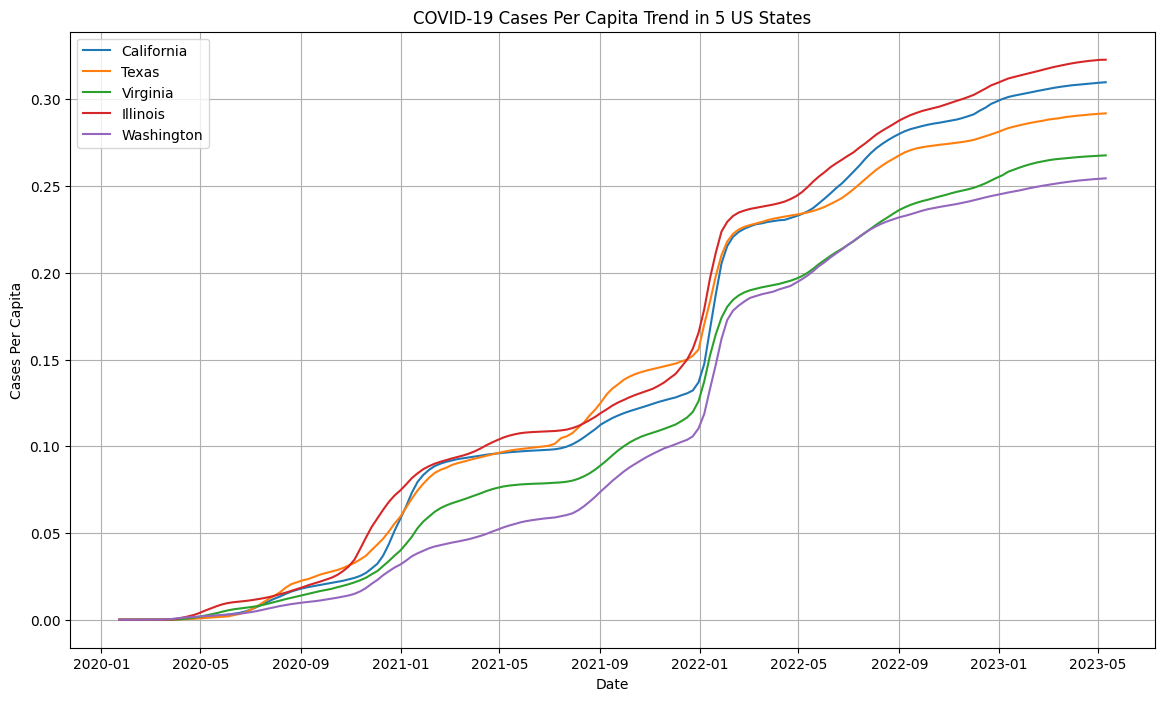

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./usa-coviddata.csv')

# 필요한 열만 추출
data = data[['date_updated', 'state', 'tot_cases']]

# 각 주의 인구 데이터 (2020년 기준)
population = {
    'California': 39538223,
    'Texas': 29145505,
    'Virginia': 8631393,
    'Illinois': 12812508,
    'Washington': 7693612
}

# 필요한 주의 데이터만 추출
states = ['California', 'Texas', 'Virginia', 'Illinois', 'Washington']
state_abbr = {'California': 'CA', 'Texas': 'TX', 'Virginia': 'VA', 'Illinois': 'IL', 'Washington': 'WA'}
data = data[data['state'].isin(state_abbr.values())]

# 날짜 형식 변환
data['date_updated'] = pd.to_datetime(data['date_updated'])

# 주 이름을 풀 네임으로 변경
data['state'] = data['state'].map({v: k for k, v in state_abbr.items()})

# 인구비례 확진자 수 비율 계산
for state in states:
    state_population = population[state]
    data.loc[data['state'] == state, 'cases_per_capita'] = data['tot_cases'] / state_population

# 피벗 테이블 생성 (날짜를 인덱스로 하고 주별로 데이터를 컬럼화)
pivot_data = data.pivot(index='date_updated', columns='state', values='cases_per_capita')

# 그래프 그리기
plt.figure(figsize=(14, 8))
for state in states:
    plt.plot(pivot_data.index, pivot_data[state], label=state)

plt.title('COVID-19 Cases Per Capita Trend in 5 US States')
plt.xlabel('Date')
plt.ylabel('Cases Per Capita')
plt.legend()
plt.grid(True)
plt.show()

# 그래프 분석 및 결론 도출
